# **Digital Signal Processing - Midterm Project**
## **Submitted by:**
| **Figure4 Members** |
|   :----:    |
| *Banta, Ian Noel M.*    |
| *Pabelico, John Paul B.*  |
| *Santander, Mark Adrian P.*   |
| *Villasor, Vince Kazer M.*  |

# **1. Libraries**

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# pd.set_option("display.max_rows", None)

# **2. Data**

## 2.1. Extraction

In [59]:
dateDF = pd.read_excel("Figure4_MidtermProject_Data.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="A")
humiDF = pd.read_excel("Figure4_MidtermProject_Data.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="B")
tempDF = pd.read_excel("Figure4_MidtermProject_Data.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="C")

## 2.2. Transformation

### 2.2.1. Data Imputation

In [60]:
humiDF['Humidity (%)'] = humiDF['Humidity (%)'].interpolate()
tempDF['Temperature (°C)'] = tempDF['Temperature (°C)'].interpolate()

## 2.3. Load

### 2.3.1 Date Time Object

In [61]:
dateGeneral = dateDF[["Date"]].to_numpy().tolist()

In [62]:
from datetime import datetime


datetimeObjects = []

for dtstr in dateGeneral:
  for dates in dtstr:
    dates = dates.replace('_', ' ')
    datetime_object = datetime.strptime(dates, '%m/%d/%Y %H:%M:%S')
    datetimeObjects.append(datetime_object)

dateDF = pd.DataFrame({'Date': datetimeObjects})

dateDF

,Date
0,2023-10-17 20:26:35
1,2023-10-17 20:41:37
2,2023-10-17 20:56:40
3,2023-10-17 21:11:43
4,2023-10-17 21:26:46
...,...
1343,2023-10-31 23:20:31
1344,2023-10-31 23:35:34
1345,2023-10-31 23:50:37
1346,2023-11-01 00:05:40


### 2.3.2 Final DataFrame

In [63]:
datetemphumiDF = pd.DataFrame()
datetemphumiDF = pd.concat([dateDF, humiDF, tempDF], axis=1)


# **3. Functions**

## 3.1. Functions For Section In General

### Getting the Data

In [64]:
dateGeneral = datetemphumiDF[["Date"]].to_numpy().tolist()
humiGeneral = datetemphumiDF[["Humidity (%)"]].to_numpy().tolist()
tempGeneral = datetemphumiDF[["Temperature (°C)"]].to_numpy().tolist()

### Plotting

In [65]:
def genScatPlotter(date, x, title):
	plt.figure(figsize=(30, 5))
	
	if title == 'Temperature (°C)':
		plt.scatter(date, x, marker='*', color = 'red', label=f"{title}")
	else:
		plt.scatter(date, x, marker='*', color = 'blue', label=f"{title}")
    
	plt.xlabel('Date')
	plt.ylabel(f'{title}')

	plt.legend(loc='upper left')
	plt.title(f"Plotting of {title} Data")
 
	if title == 'Temperature (°C)':
		plt.savefig('TemperatureGeneral.png', dpi=500)
	else:
		plt.savefig('HumidityGeneral.png', dpi=500)
  
	plt.grid()
	plt.show()
 
def genRawPlotter(x, y, date):
	fig, ax1 = plt.subplots(figsize=(25, 5))

	ax1.plot(date, x, marker='*', color = 'red', label="Temperature")

	ax1.set_xlabel('Date')
	ax1.set_ylabel('Temperature')
	ax1.tick_params(axis='y', labelcolor='tab:red')

	ax2 = ax1.twinx() 

	ax2.set_ylabel('Humidity')
	ax2.plot(date, y, marker='.', color = 'blue', label="Humid")	
	ax2.tick_params(axis='y', labelcolor='tab:blue')

	lines, labels = ax1.get_legend_handles_labels()
	lines2, labels2 = ax2.get_legend_handles_labels()
	ax1.legend(lines + lines2, labels + labels2, loc='upper left')
 
	plt.title("Plotting of Temperature and Humidity Data")
	plt.savefig('RelationTempHumiGeneral.png', dpi=500)
	plt.grid()
	plt.show()

def genHist(x, title):
  
  plt.figure(figsize=(5, 5))
  plt.hist(x)

  plt.xlabel(f'{title}')
  plt.ylabel('Frequency')
  
  if title == 'Temperature (°C)':
    plt.savefig('TemperatureHist.png', dpi=500)
  else:
    plt.savefig('HumidityHist.png', dpi=500)
  plt.show() 


### Central Tendencies

In [66]:
def getMean(x):
    return np.mean(x)

def getMedian(x):
    return np.median(x)

def getMode(x):
    vals, counts = np.unique(x, return_counts=True)
    mode = np.argwhere(counts == np.max(counts))
    return vals[mode].flatten()

def getVariance(x):
    return np.var(x)

def getStandardDeviation(x):
    # standard deviation represents noise and other interference.
    #  the standard deviation is not important in itself, but only in comparison to the mean.
    return np.std(x)

def getSignalToNoiseRatio(mean, std):
    return mean / std

def getCoefficientOfVariation(mean, std):
    #  a signal (or other group of measure values) with a CV of 2%, has an SNR of 50.  Better data means a higher value for the SNR and a lower value for the CV.
    return (std / mean) * 100
  
def getGenStats(data, title):
  if title == 'Temperature':
    genMean = getMean(data)
    genMedian = getMedian(data)
    genMode = getMode(data)
    genVar = getVariance(data)
    genSTD = getStandardDeviation(data)
    genSTR = getSignalToNoiseRatio(genMean, genSTD)
    genCV = getCoefficientOfVariation(genMean, genSTD)
  
    print(f'Mean = {genMean}°C')
    print(f'Median = {genMedian}°C')
    print(f'Mode = {genMode}°C')
    print(f'Variance = {genVar}')
    print(f'Standard Dev = {genSTD}')
    print(f'STR = {genSTR}')
    print(f'CV = {genCV}%')
  
  else:
    genMean = getMean(data)
    genMedian = getMedian(data)
    genMode = getMode(data)
    genVar = getVariance(data)
    genSTD = getStandardDeviation(data)
    genSTR = getSignalToNoiseRatio(genMean, genSTD)
    genCV = getCoefficientOfVariation(genMean, genSTD)
  
    print(f'Mean = {genMean}%')
    print(f'Median = {genMedian}%')
    print(f'Mode = {genMode}%')
    print(f'Variance = {genVar}')
    print(f'Standard Dev = {genSTD}')
    print(f'STR = {genSTR}')
    print(f'CV = {genCV}%')

## 3.2. Functions For Section Time of day

### Filtering Data

In [67]:
indexesOfLateNight = []
indexesOfMorning = []
indexesOfAfternoon = []
indexesOfEvening = []
 
for i in range(len(datetemphumiDF)):
    dateTimeSplit = datetemphumiDF['Date'][i].split('_')

    timeSplit = dateTimeSplit[1].split(':')
    hour = timeSplit[0]
    
    # Late Night
    if hour in ['00', '01', '02', '03', '04', '05']:
        indexesOfLateNight.append(i)
        
    # Morning
    if hour in ['06', '07', '08', '09', '10', '11']:
        indexesOfMorning.append(i)
    
    # # Afternoon
    if hour in ['12', '13', '14', '15', '16', '17']:
        indexesOfAfternoon.append(i)
    
    # # Evening
    if hour in ['18', '19', '20', '21', '22', '23']:
        indexesOfEvening.append(i)

AttributeError: 'Timestamp' object has no attribute 'split'

In [ ]:
def getFilteredData(get, indexesOfTargets, datetemphumiDF):
    indexesOfTargetsPerDay = []
    tempOfTargetsPerDay = []
    humiOfTargetsPerDay = []
    datesOfTargets = []
    hoursOfTargets = []

    tempList = []
    temperatures = []
    humidity = []
    datesList = []
    prevDate = None

    lastIndexFromIndexesOfTargets= indexesOfTargets[-1]
    lastElement = datetemphumiDF['Date'][lastIndexFromIndexesOfTargets]
    
    hoursList = []

    for indx in indexesOfTargets:
        dateTimeSplit = datetemphumiDF['Date'][indx].split('_')
        dateSplit = dateTimeSplit[0].split('/')
        date = dateSplit[1]
        datetimeFromDF = dateDF['Date'][indx]
        timeSplit = dateTimeSplit[1].split(':')
        time = dateTimeSplit[1]
        
        if (date != prevDate and prevDate != None) or datetimeFromDF == lastElement:
            indexesOfTargetsPerDay.append(tempList)
            tempOfTargetsPerDay.append(temperatures)
            humiOfTargetsPerDay.append(humidity)
            datesOfTargets.append(datesList)
            hoursOfTargets.append(hoursList)
            
            tempList = []
            temperatures = []
            humidity = []
            datesList = []
            hoursList = []
        
        tempList.append(indx)
        temperatures.append(datetemphumiDF['Temperature (°C)'][indx])
        humidity.append(datetemphumiDF['Humidity (%)'][indx])
        datesList.append(datetimeFromDF)
        hoursList.append(time)
        
        prevDate = date
    
    if get == 'temp':
        return zip(tempOfTargetsPerDay, datesOfTargets, hoursOfTargets)
    
    return zip(humiOfTargetsPerDay, datesOfTargets, hoursOfTargets)

### Plotting

In [ ]:
def plotFilteredData(show, title, filteredData):
    plt.figure(figsize=(25,5), dpi=500, layout='tight')

    plt.title(title)
    plt.ylabel(show)
    plt.xlabel("DATE AND TIME")

    for item, date, minutes in filteredData:
        dateLabel = date[0].split('/')[1]
        plt.scatter(date, item, label=f'Oct{dateLabel}')

    plt.setp(plt.xticks(fontsize=7))
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.grid()
    plt.show()

def plotFilteredDataPerDay(show, title, filteredData):
    position = 1
    
    plt.figure(figsize=(50, 50), dpi=500)

    for item, date, minutes in filteredData:
        plt.subplot(8, 3, position)
        plt.scatter(minutes, item, c=item)
        plt.title(date[0].split('_')[0])
        position += 1

        plt.subplots_adjust(wspace=0.1, hspace=0.3)
        plt.xticks(rotation=45)
        plt.ylabel(show)
        plt.xlabel("Hour")
        plt.grid()
        
    plt.figtext(0.47, 0.90, title, fontsize=50)
    plt.show()

### Central Tendencies

In [ ]:
def getTargetData(get, indexesOfTargets, dataFrame):
    filteredData = getFilteredData(get, indexesOfTargets, dataFrame)

    targetData = []

    for values, date, minutes in filteredData:
        for item in values:
            targetData.append(item)
    
    return targetData

def getStats(get, indexesOfTargets, dataFrame):
    if get == 'temp':
        temp = getTargetData('temp', indexesOfTargets, dataFrame)

        mean = getMean(temp)
        median = getMedian(temp)
        mode = getMode(temp)
        variance = getVariance(temp)
        standardDeviation = getStandardDeviation(temp)
        snr = getSignalToNoiseRatio(mean, standardDeviation)
        cv = getCoefficientOfVariation(mean, standardDeviation)

        print(f'Mean = {mean}°C')
        print(f'Median = {median}°C')
        print(f'Mode = {mode}°C')
        print(f'Variance = {variance}')
        print(f'Standard Deviation = {standardDeviation}')
        print(f'Signal to Noise Ratio = {snr}')
        print(f'Coefficient of Variation = {cv}%')
    
    else:
        humi = getTargetData('humi', indexesOfTargets, dataFrame)

        mean = getMean(humi)
        median = getMedian(humi)
        mode = getMode(humi)
        variance = getVariance(humi)
        standardDeviation = getStandardDeviation(humi)
        snr = getSignalToNoiseRatio(mean, standardDeviation)
        cv = getCoefficientOfVariation(mean, standardDeviation)

        print(f'Mean = {mean}%')
        print(f'Median = {median}%')
        print(f'Mode = {mode}%')
        print(f'Variance = {variance}')
        print(f'Standard Deviation = {standardDeviation}')
        print(f'Signal to Noise Ratio = {snr}')
        print(f'Coefficient of Variation = {cv}%')

## 3.3. Functions For Section Day of Week

In [ ]:
datetemphumiDF[['Month', 'Day', 'Year']] = datetemphumiDF['Date'].str.split('/', expand=True)

In [ ]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Monday_23 = datetemphumiDF[datetemphumiDF['Day'] == '23']
Monday_30 = datetemphumiDF[datetemphumiDF['Day'] == '30']
print("Monday 23")
print(Monday_23[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Monday 30")
print(Monday_30[['Time', 'Temperature (°C)', 'Humidity (%)']])

In [ ]:
Monday = datetemphumiDF[(datetemphumiDF['Day'] == '23') | (datetemphumiDF['Day'] == '30')]

print("Monday")
print(Monday)

In [ ]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Tuesday_17 = datetemphumiDF[datetemphumiDF['Day'] == '17']
Tuesday_24 = datetemphumiDF[datetemphumiDF['Day'] == '24']
Tuesday_31 = datetemphumiDF[datetemphumiDF['Day'] == '31']
print("Tuesday 17")
print(Tuesday_17[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Tuesday 24")
print(Tuesday_24[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Tuesday 31")
print(Tuesday_31[['Time', 'Temperature (°C)', 'Humidity (%)']])

In [ ]:
Tuesday = datetemphumiDF[(datetemphumiDF['Day'] == '17') | (datetemphumiDF['Day'] == '24') | (datetemphumiDF['Day'] == '31')]

print("Tuesday")
print(Tuesday)

In [ ]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Wednesday_18 = datetemphumiDF[datetemphumiDF['Day'] == '18']
Wednesday_25 = datetemphumiDF[datetemphumiDF['Day'] == '25']

print("Wednesday 18")
print(Wednesday_18[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Wednesday 25")
print(Wednesday_25[['Time', 'Temperature (°C)', 'Humidity (%)']])

In [ ]:
Wednesday = datetemphumiDF[(datetemphumiDF['Day'] == '18') | (datetemphumiDF['Day'] == '25')]

print("Wednesday")
print(Wednesday)

In [ ]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Thursday_19 = datetemphumiDF[datetemphumiDF['Day'] == '18']
Thursday_26 = datetemphumiDF[datetemphumiDF['Day'] == '26']

print("Thursday 19")
print(Thursday_19[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Thursday 26")
print(Thursday_26[['Time', 'Temperature (°C)', 'Humidity (%)']])

In [ ]:
Thursday = datetemphumiDF[(datetemphumiDF['Day'] == '19') | (datetemphumiDF['Day'] == '26')]

print("Thursday")
print(Thursday)

In [ ]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Friday = datetemphumiDF[(datetemphumiDF['Day'] == '20') | (datetemphumiDF['Day'] == '27')]
Friday_20 = datetemphumiDF[datetemphumiDF['Day'] == '20']
Friday_27 = datetemphumiDF[datetemphumiDF['Day'] == '27']

print("Friday 20")
print(Friday_20[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Friday 27")
print(Friday_27[['Time', 'Temperature (°C)', 'Humidity (%)']])

In [ ]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Saturday = datetemphumiDF[(datetemphumiDF['Day'] == '21') | (datetemphumiDF['Day'] == '28')]
Saturday_21 = datetemphumiDF[datetemphumiDF['Day'] == '21']
Saturday_28 = datetemphumiDF[datetemphumiDF['Day'] == '28']
print("Saturday 21")
print(Saturday_21[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Saturday 28")
print(Saturday_28[['Time', 'Temperature (°C)', 'Humidity (%)']])

In [ ]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Sunday = datetemphumiDF[(datetemphumiDF['Day'] == '22') | (datetemphumiDF['Day'] == '29')]
Sunday_22 = datetemphumiDF[datetemphumiDF['Day'] == '22']
Sunday_29 = datetemphumiDF[datetemphumiDF['Day'] == '29']

print("Sunday 22")
print(Sunday_22[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Sunday 29")
print(Sunday_29[['Time', 'Temperature (°C)', 'Humidity (%)']])

# **4. Plotting of Data based on Different Time Intervals**

### IN GENERAL

TO SEE THE RELATIONSHIP

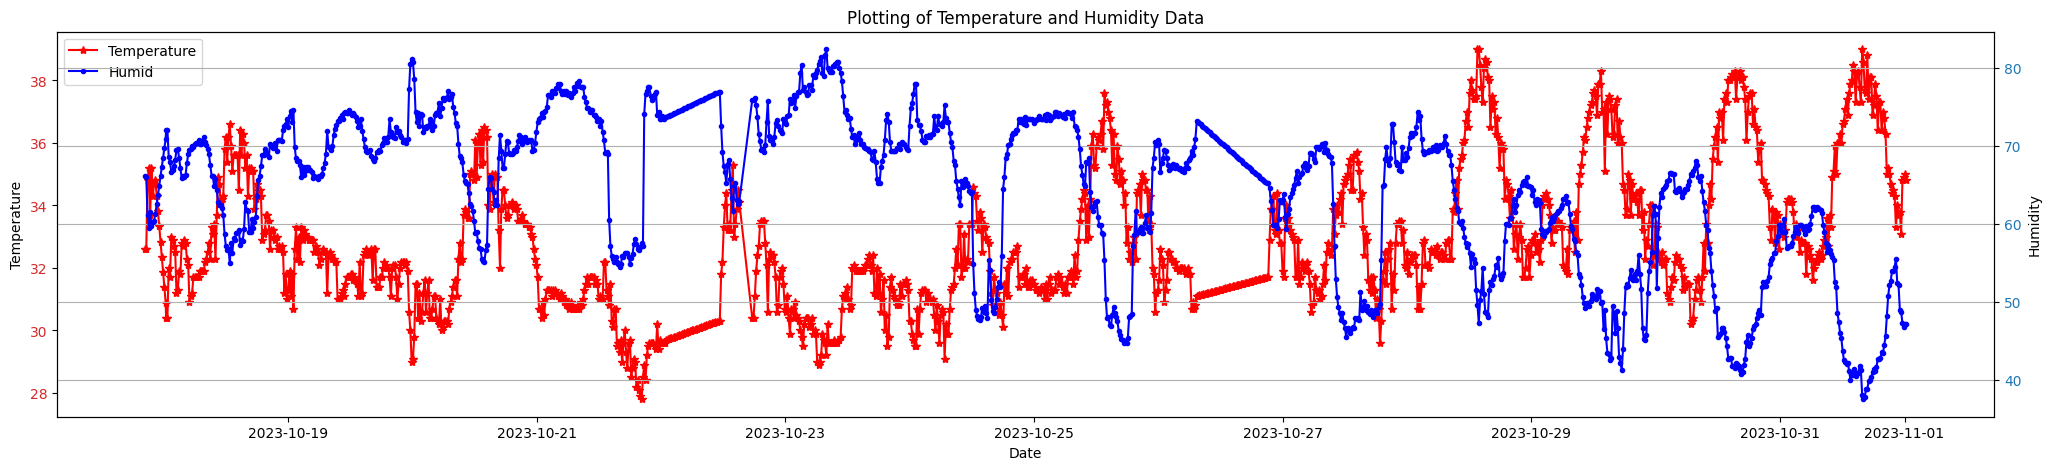

In [69]:
genRawPlotter(datetemphumiDF[["Temperature (°C)"]], datetemphumiDF[["Humidity (%)"]], datetemphumiDF['Date'])

TEMPERATURE SOLO

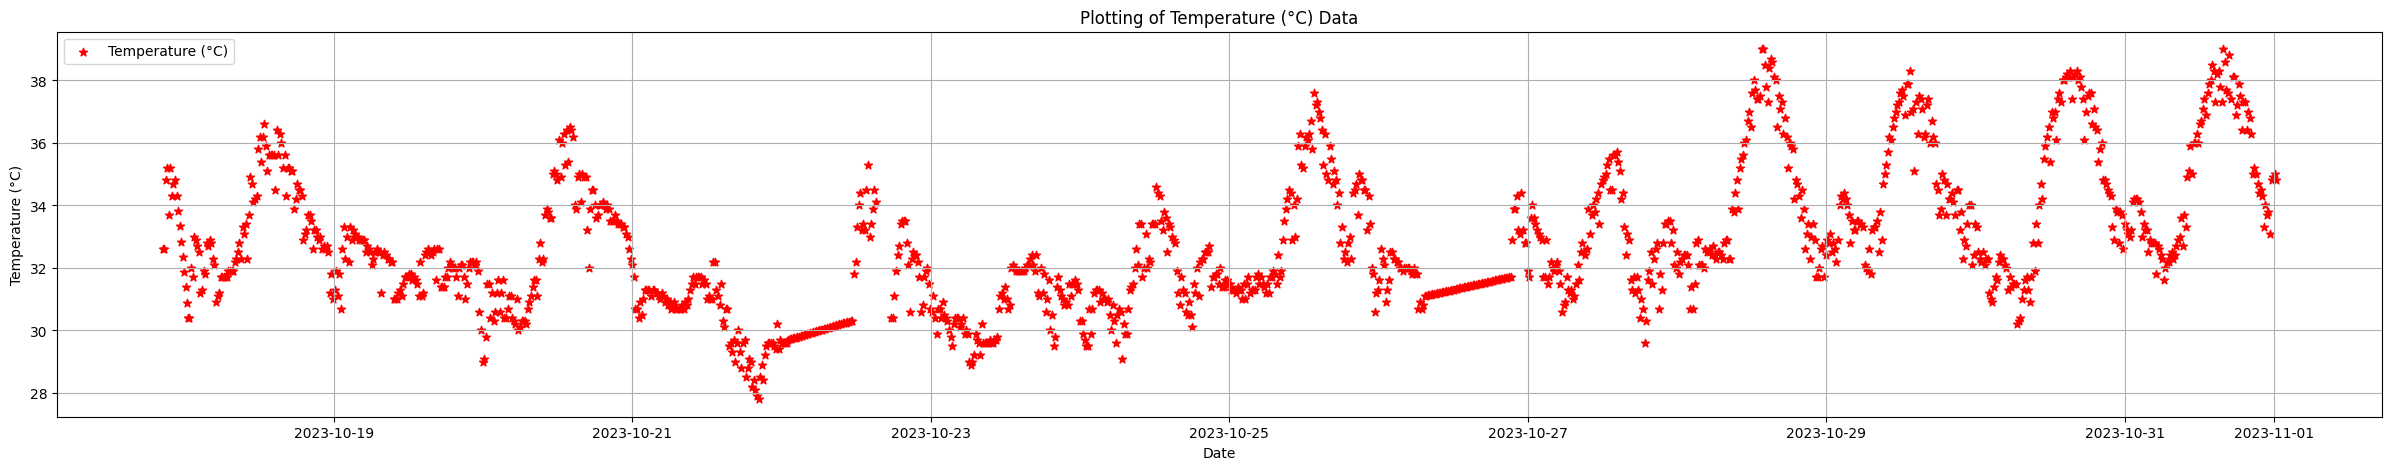

In [70]:
genScatPlotter(datetemphumiDF['Date'], datetemphumiDF[["Temperature (°C)"]], "Temperature (°C)")

HUMIDITY SOLO

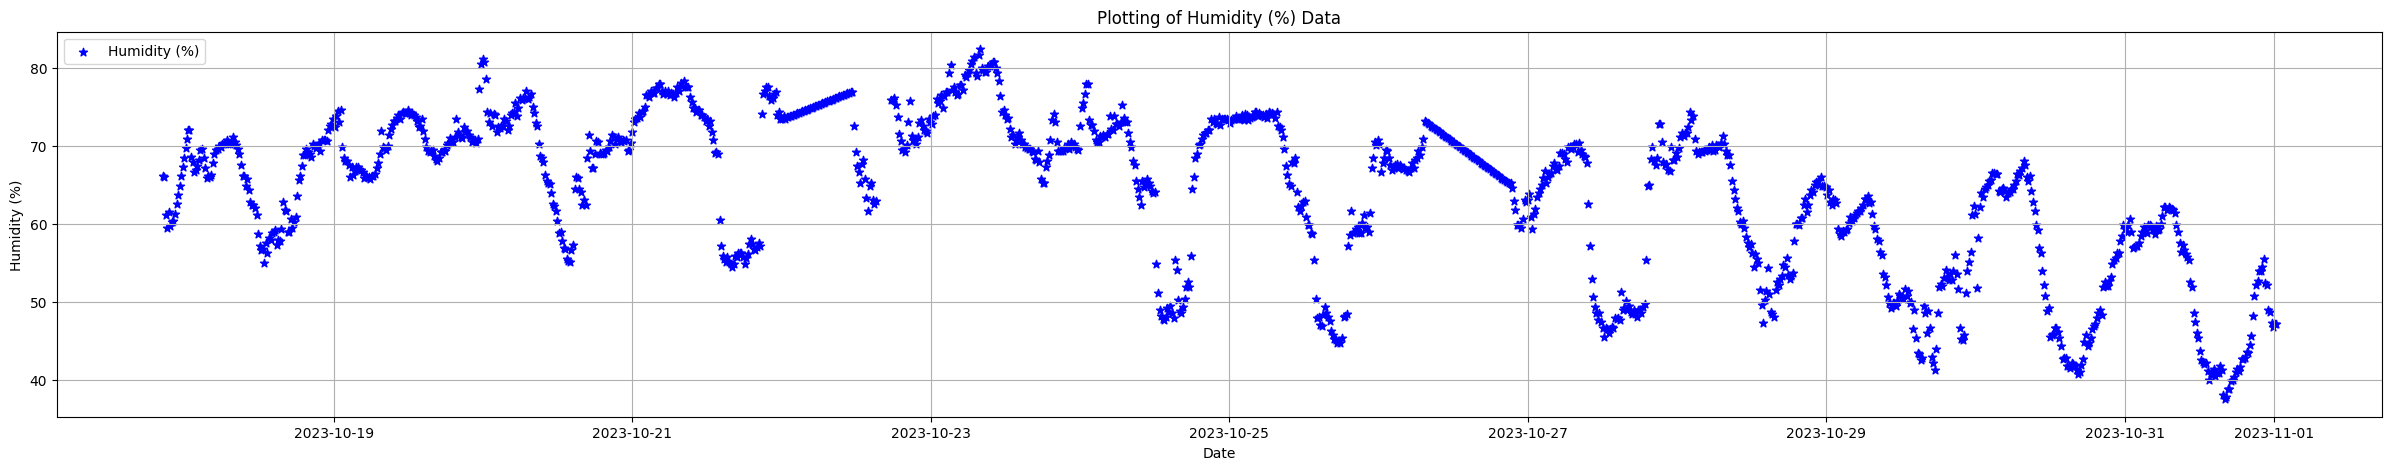

In [71]:
genScatPlotter(datetemphumiDF['Date'], datetemphumiDF[["Humidity (%)"]],  "Humidity (%)")

### TIME OF DAY

LATE NIGHT

In [72]:
plotFilteredData('Temperature in °C', 'LATE NIGHT', getFilteredData('temp', indexesOfLateNight, datetemphumiDF))
plotFilteredDataPerDay('Temperature in °C', 'LATE NIGHT', getFilteredData('temp', indexesOfLateNight, datetemphumiDF))

NameError: name 'plotFilteredData' is not defined

In [ ]:
plotFilteredData('Humidity in %', 'LATE NIGHT', getFilteredData('humi', indexesOfLateNight, datetemphumiDF))
plotFilteredDataPerDay('Humidity in %', 'LATE NIGHT', getFilteredData('humi', indexesOfLateNight, datetemphumiDF))

MORNING

In [ ]:
plotFilteredData('Temperature in °C', 'MORNING', getFilteredData('temp', indexesOfMorning, datetemphumiDF))
plotFilteredDataPerDay('Temperature in °C', 'MORNING', getFilteredData('temp', indexesOfMorning, datetemphumiDF))

In [ ]:
plotFilteredData('Humidity in %', 'MORNING', getFilteredData('humi', indexesOfMorning, datetemphumiDF))
plotFilteredDataPerDay('Humidity in %', 'MORNING', getFilteredData('humi', indexesOfMorning, datetemphumiDF))

AFTERNOON

In [ ]:
plotFilteredData('Temperature in °C', 'AFTERNOON', getFilteredData('temp', indexesOfAfternoon, datetemphumiDF))
plotFilteredDataPerDay('Temperature in °C', 'AFTERNOON', getFilteredData('temp', indexesOfAfternoon, datetemphumiDF))

In [ ]:
plotFilteredData('Humidity in %', 'AFTERNOON', getFilteredData('humi', indexesOfAfternoon, datetemphumiDF))
plotFilteredDataPerDay('Humidity in %', 'AFTERNOON', getFilteredData('humi', indexesOfAfternoon, datetemphumiDF))

EVENING

In [ ]:
plotFilteredData('Temperature in °C', 'EVENING', getFilteredData('temp', indexesOfEvening, datetemphumiDF))
plotFilteredDataPerDay('Temperature in °C', 'EVENING', getFilteredData('temp', indexesOfEvening, datetemphumiDF))

In [ ]:
plotFilteredData('Humidity in %', 'EVENING', getFilteredData('humi', indexesOfEvening, datetemphumiDF))
plotFilteredDataPerDay('Humidity in %', 'EVENING', getFilteredData('humi', indexesOfEvening, datetemphumiDF))

### DAY OF WEEK

In [ ]:
Monday_temperatures = [Monday_23, Monday_30] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for MondayComb in Monday_temperatures:
    plt.subplot(2, 3, position)
    timestamps = MondayComb['Time']
    temperatures = MondayComb['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Monday")
    plt.xlabel("Time")
    plt.ylabel("October 23 and 30 Temperature")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Monday_humidity = [Monday_23, Monday_30] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for MondayComb in Monday_humidity:
    plt.subplot(2, 3, position)
    timestamps = MondayComb['Time']
    humidity = MondayComb['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, humidity, marker='.', color='blue')
    plt.title("Monday")
    plt.xlabel("Time")
    plt.ylabel("October 23 and 30 Humidity")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Tuesday_temperatures = [Tuesday_17, Tuesday_24, Tuesday_31] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for TuesdayComb in Tuesday_temperatures:
    plt.subplot(2, 3, position)
    timestamps = TuesdayComb['Time']
    temperatures = TuesdayComb['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Tuesday")
    plt.xlabel("Time")
    plt.ylabel("October 17, 24 and 31 Temperature")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Tuesday_humidity = [Tuesday_17, Tuesday_24, Tuesday_31] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for TuesdayComb in Tuesday_humidity:
    plt.subplot(2, 3, position)
    timestamps = TuesdayComb['Time']
    humidity = TuesdayComb['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, humidity, marker='.', color='blue')
    plt.title("Tuesday")
    plt.xlabel("Time")
    plt.ylabel("October 17, 24 and 31 Humidity")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Wednesday_temperatures = [Wednesday_18, Wednesday_25] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for WednesdayComb in Wednesday_temperatures:
    plt.subplot(2, 3, position)
    timestamps = MondayComb['Time']
    temperatures = MondayComb['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Wednesday")
    plt.xlabel("Time")
    plt.ylabel("October 18 and 25 Temperature")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Wednesday_humidity = [Wednesday_18, Wednesday_25] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for WednesdayComb in Wednesday_humidity:
    plt.subplot(2, 3, position)
    timestamps = WednesdayComb['Time']
    humidity = WednesdayComb['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, humidity, marker='.', color='blue')
    plt.title("Wednesday")
    plt.xlabel("Time")
    plt.ylabel("October 18 and 25 Humidity")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Thursday_temperatures = [Thursday_19, Thursday_26] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for ThursdayComb in Thursday_temperatures:
    plt.subplot(2, 3, position)
    timestamps = ThursdayComb['Time']
    temperatures = ThursdayComb['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Thursday")
    plt.xlabel("Time")
    plt.ylabel("October 19 and 26 Temperature")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Thursday_humidity = [Thursday_19, Thursday_26] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for ThursdayComb in Thursday_humidity:
    plt.subplot(2, 3, position)
    timestamps = ThursdayComb['Time']
    humidity = ThursdayComb['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, humidity, marker='.', color='blue')
    plt.title("Thursday")
    plt.xlabel("Time")
    plt.ylabel("October 19 and 26 Humidity")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Friday_temperatures = [Friday_20, Friday_27] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for FridayCombT in Friday_temperatures:
    plt.subplot(1, 2, position)
    timestamps = FridayCombT['Time']
    temperatures = FridayCombT['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Friday")
    plt.xlabel("Time")
    plt.ylabel("October 20 and 27 Temperature")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Friday_humidity = [Friday_20, Friday_27] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for FridayCombH in Friday_humidity:
    plt.subplot(1, 2, position)
    timestamps = FridayCombH['Time']
    temperatures = FridayCombH['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Friday")
    plt.xlabel("Time")
    plt.ylabel("October 20 and 27 Humidity")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Saturday_temperatures = [Saturday_21, Saturday_28] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for SatCombT in Saturday_temperatures:
    plt.subplot(1, 2, position)
    timestamps = SatCombT['Time']
    temperatures = SatCombT['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Saturday")
    plt.xlabel("Time")
    plt.ylabel("October 21 and 28 Temperature")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Saturday_humidity = [Saturday_21, Saturday_28] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for SatCombH in Saturday_humidity:
    plt.subplot(1, 2, position)
    timestamps = SatCombH['Time']
    temperatures = SatCombH['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Saturday")
    plt.xlabel("Time")
    plt.ylabel("October 21 and 28 Humidity")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Sunday_temperatures = [Sunday_22, Sunday_29] 
plt.figure(figsize=(30, 15), dpi=500)
position = 1
tempIndex = 0

for SunCombT in Sunday_temperatures:
    plt.subplot(1, 2, position)
    timestamps = SunCombT['Time']
    temperatures = SunCombT['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Sunday")
    plt.xlabel("Time")
    plt.ylabel("October 22 and 29 Temperature")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [ ]:
Sunday_humidity = [Sunday_22, Sunday_29] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for SunCombH in Sunday_humidity:
    plt.subplot(1, 2, position)
    timestamps = SunCombH['Time']
    temperatures = SunCombH['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Sunday")
    plt.xlabel("Time")
    plt.ylabel("October 22 and 29 Humidity")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

# **5. Analysis Goals:**

## 5.1. What is the periodicity of the data?

### In General

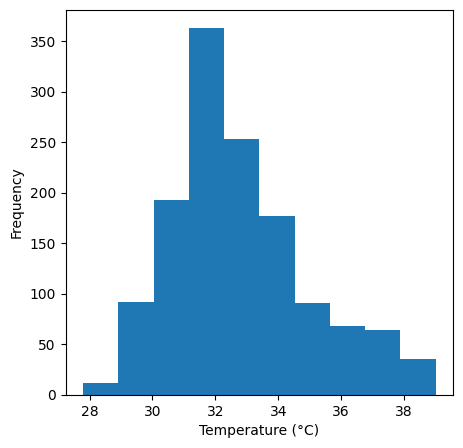

In [73]:
genHist(datetemphumiDF[["Temperature (°C)"]], 'Temperature (°C)')

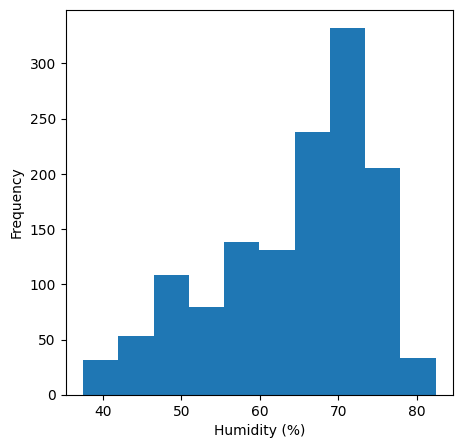

In [74]:
genHist(datetemphumiDF[["Humidity (%)"]], 'Humidity (%)')

### Day of week

In [ ]:
Monday_temperatures = [Monday_23, Monday_30] 
temps = []

for i in Monday_temperatures:
    for temp in i["Temperature (°C)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')

plt.show() 

In [ ]:
Monday_humidity = [Monday_23, Monday_30] 
temps = []

for i in Monday_humidity:
    for temp in i["Humidity (%)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')

plt.show() 

In [ ]:
Tuesday_temperatures = [Tuesday_17, Tuesday_24, Tuesday_31] 
temps = []

for i in Tuesday_temperatures:
    for temp in i["Temperature (°C)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')

plt.show() 

In [ ]:
Tuesday_humidity = [Tuesday_17, Tuesday_24, Tuesday_31] 
temps = []

for i in Tuesday_humidity:
    for temp in i["Humidity (%)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')

plt.show() 

In [ ]:
Wednesday_temperatures = [Wednesday_18, Wednesday_25] 
temps = []

for i in Wednesday_temperatures:
    for temp in i["Temperature (°C)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')

plt.show() 

In [ ]:
Wednesday_humidity = [Wednesday_18, Wednesday_25] 
temps = []

for i in Wednesday_humidity:
    for temp in i["Humidity (%)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')

plt.show() 

In [ ]:
Thursday_temperatures = [Thursday_19, Thursday_26] 
temps = []

for i in Thursday_temperatures:
    for temp in i["Temperature (°C)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')

plt.show() 

In [ ]:
Thursday_humidity = [Thursday_19, Thursday_26] 
temps = []

for i in Thursday_humidity:
    for temp in i["Humidity (%)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')

plt.show() 

In [ ]:
Friday_temperatures = [Friday_20, Friday_27] 
FriComHistoTemp = []

for i in Friday_temperatures:
    for fritemp in i["Temperature (°C)"]:
        FriComHistoTemp.append(fritemp)

plt.figure(figsize=(8, 5))
plt.hist(FriComHistoTemp)
plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')
plt.show()

In [ ]:
Friday_humidity = [Friday_20, Friday_27] 
FriComHistoHum = []

for i in Friday_humidity:
    for frihum in i["Humidity (%)"]:
        FriComHistoHum.append(frihum)

plt.figure(figsize=(8, 5))
plt.hist(FriComHistoHum)
plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')
plt.show()

In [ ]:
Saturday_temperatures = [Saturday_21, Saturday_28] 
SatComHistoTemp = []

for i in Saturday_temperatures:
    for sattemp in i["Temperature (°C)"]:
        SatComHistoTemp.append(sattemp)

plt.figure(figsize=(8, 5))
plt.hist(SatComHistoTemp)
plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')
plt.show() 

In [ ]:
Saturday_humidity = [Saturday_21, Saturday_28] 
SatComHistoHum = []

for i in Saturday_humidity:
    for sathum in i["Humidity (%)"]:
        SatComHistoHum.append(sathum)

plt.figure(figsize=(8, 5))
plt.hist(SatComHistoHum)
plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')
plt.show() 

In [ ]:
Sunday_temperatures = [Sunday_22, Sunday_29] 
SunComHistoTemp = []

for i in Sunday_temperatures:
    for suntemp in i["Temperature (°C)"]:
        SunComHistoTemp.append(suntemp)

plt.figure(figsize=(8, 5))
plt.hist(SunComHistoTemp)
plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')
plt.show() 

In [ ]:
Sunday_humidity = [Sunday_22, Sunday_29] 
SunComHistoHum = []

for i in Sunday_humidity:
    for sunhum in i["Humidity (%)"]:
        SunComHistoHum.append(sunhum)

plt.figure(figsize=(8, 5))
plt.hist(SunComHistoHum)
plt.xlabel("Humidity (%")
plt.ylabel('Frequency')
plt.show() 

### Time of day

In [ ]:
## histogram 

## 5.2. What are the central tendencies of the data according to time of day, day of week, and in general?

### 5.2.1. Time of day

LATE NIGHT

In [ ]:
getStats('temp', indexesOfLateNight, datetemphumiDF)

In [ ]:
getStats('humi', indexesOfLateNight, datetemphumiDF)

MORNING

In [ ]:
getStats('temp', indexesOfMorning, datetemphumiDF)

In [ ]:
getStats('humi', indexesOfMorning, datetemphumiDF)

AFTERNOON

In [ ]:
getStats('temp', indexesOfAfternoon, datetemphumiDF)

In [ ]:
getStats('humi', indexesOfAfternoon, datetemphumiDF)

EVENING

In [ ]:
getStats('temp', indexesOfEvening, datetemphumiDF)

In [ ]:
getStats('humi', indexesOfEvening, datetemphumiDF)

### 5.2.2. Day of week

Mondays To Thursdays

In [ ]:
Monday_temperatures = Monday['Temperature (°C)']

mean_temperature = Monday_temperatures.mean()
median_temperature = Monday_temperatures.median()
mode_temperature = Monday_temperatures.mode().values[0]

temperature_statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(temperature_statistics_df)

In [ ]:
Monday_humidity = Monday['Humidity (%)'] 

mean_humidity = Monday_humidity.mean()
median_humidity = Monday_humidity.median()
mode_humidity = Monday_humidity.mode().values[0]

statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(statistics_df)

In [ ]:
Tuesday_temperatures = Tuesday['Temperature (°C)']

mean_temperature = Tuesday_temperatures.mean()
median_temperature = Tuesday_temperatures.median()
mode_temperature = Tuesday_temperatures.mode().values[0]

temperature_statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(temperature_statistics_df)

In [ ]:
Tuesday_humidity = Tuesday['Humidity (%)'] 

mean_humidity = Tuesday_humidity.mean()
median_humidity = Tuesday_humidity.median()
mode_humidity = Tuesday_humidity.mode().values[0]

statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(statistics_df)

In [ ]:
Wednesday_temperatures = Wednesday['Temperature (°C)']

mean_temperature = Wednesday_temperatures.mean()
median_temperature = Wednesday_temperatures.median()
mode_temperature = Wednesday_temperatures.mode().values[0]

temperature_statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(temperature_statistics_df)

In [ ]:
Wednesday_humidity = Wednesday['Humidity (%)'] 

mean_humidity = Wednesday_humidity.mean()
median_humidity = Wednesday_humidity.median()
mode_humidity = Wednesday_humidity.mode().values[0]

statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(statistics_df)

In [ ]:
Thursday_temperatures = Thursday['Temperature (°C)']

mean_temperature = Thursday_temperatures.mean()
median_temperature = Thursday_temperatures.median()
mode_temperature = Thursday_temperatures.mode().values[0]

temperature_statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(temperature_statistics_df)

In [ ]:
Thursday_humidity = Thursday['Humidity (%)'] 

mean_humidity = Thursday_humidity.mean()
median_humidity = Thursday_humidity.median()
mode_humidity = Thursday_humidity.mode().values[0]

statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(statistics_df)

Fridays To Sundays

In [ ]:
Friday_temperatures = Friday['Temperature (°C)']

mean_temperature = Friday_temperatures.mean()
median_temperature = Friday_temperatures.median()
mode_temperature = Friday_temperatures.mode().values[0]

fritempdata = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(fritempdata)

In [ ]:
Friday_humidity = Friday['Humidity (%)'] 

mean_humidity = Friday_humidity.mean()
median_humidity = Friday_humidity.median()
mode_humidity = Friday_humidity.mode().values[0]

frihumiddata = pd.DataFrame({
    'Metric': ['Mean Humidity', 'Median Humidity', 'Mode Humidity'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(frihumiddata)

In [ ]:
Saturday_temperatures = Saturday['Temperature (°C)']

Sat_mean_temperature = Saturday_temperatures.mean()
Sat_median_temperature = Saturday_temperatures.median()
Sat_mode_temperature = Saturday_temperatures.mode().values[0]

sattempdata = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [Sat_mean_temperature, Sat_median_temperature, Sat_mode_temperature]
})
print(sattempdata)

In [ ]:
Saturday_humidity = Saturday['Humidity (%)'] 

Sat_mean_humidity = Saturday_humidity.mean()
Sat_median_humidity = Saturday_humidity.median()
Sat_mode_humidity = Saturday_humidity.mode().values[0]

sathumdata = pd.DataFrame({
    'Metric': ['Mean Humidity', 'Median Humidity', 'Mode Humidity'],
    'Value': [Sat_mean_humidity, Sat_median_humidity, Sat_mode_humidity]
})
print(sathumdata)

In [ ]:
Sunday_temperatures = Sunday['Temperature (°C)']

Sun_mean_temperature = Sunday_temperatures.mean()
Sun_median_temperature = Sunday_temperatures.median()
Sun_mode_temperature = Sunday_temperatures.mode().values[0]

suntempdata = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [Sun_mean_temperature, Sun_median_temperature, Sun_mode_temperature]
})

print(suntempdata)

In [ ]:
Sunday_humidity = Sunday['Humidity (%)'] 

Sun_mean_humidity = Sunday_humidity.mean()
Sun_median_humidity = Sunday_humidity.median()
Sun_mode_humidity = Sunday_humidity.mode().values[0]

sunhumdata = pd.DataFrame({
    'Metric': ['Mean Humidity', 'Median Humidity', 'Mode Humidity'],
    'Value': [Sun_mean_humidity, Sun_median_humidity, Sun_mode_humidity]
})

print(sunhumdata)

### 5.2.3 In general

In General

In [ ]:
getGenStats(tempGeneral, "Temperature")

Mean = 32.75°C
Median = 32.3°C
Mode = 31.7°C
Variance = 4.76726344928014
Standard Dev = 2.183406386653694
STR = 14.9994981237519
CV = 6.666889730240287%


In [ ]:
getGenStats(humiGeneral, "Humidity")

Mean = 64.34554896142433%
Median = 67.2%
Mode = 69.5%
Variance = 98.36514601233884
Standard Dev = 9.917920447973902
STR = 6.487806521433559
CV = 15.413529930282785%


## 5.3. What patterns arise from the data you are analyzing?

### 5.3.1. idk haha

In [ ]:
# hahaha

# 6. Conclusion?

## 6.1. Haha

### 6.1.1. hahaha